#Лабораторная 1

## Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/Econom_Cities_data.csv', sep=';', encoding='utf-8')

## Просмотр данных

In [3]:
df.shape

(48, 4)

In [4]:
list(df.columns)

['City', 'Work', 'Price', 'Salary']

In [5]:
df

,City,Work,Price,Salary
0,Amsterdam,1714,"65,6",49
1,Athens,1792,"53,8","30,4"
2,Bogota,2152,"37,9","11,5"
3,Bombay,2052,"30,3","5,3"
4,Brussels,1708,"73,8","50,5"
5,Buenos_Aires,1971,"56,1","12,5"
6,Cairo,-9999,"37,1",-9999
7,Caracas,2041,61,"10,9"
8,Chicago,1924,"73,9","61,9"
9,Copenhagen,1717,"91,3","62,9"


Проверяем из чего вообще состоят данные, есть ли нулы и какие типы данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    48 non-null     object
 1   Work    48 non-null     int64 
 2   Price   48 non-null     object
 3   Salary  48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [7]:
df.describe()

,Work
count,48.000000
mean,1384.958333
std,2404.897007
min,-9999.000000
25%,1740.750000
50%,1834.500000
75%,1972.750000
max,2375.000000


##Чистка данных

Мне не понравилось, что price и  salary непонятного типа, приведем к числу

In [8]:
df["Price"]  = pd.to_numeric(df["Price"].astype(str).str.replace(",", "."))
df["Salary"] = pd.to_numeric(df["Salary"].astype(str).str.replace(",", "."))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    48 non-null     object 
 1   Work    48 non-null     int64  
 2   Price   48 non-null     float64
 3   Salary  48 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


Уберем выбросы если есть по методу 3IQR

In [10]:
num_cols = ["Work","Price","Salary"]
num_df = df[num_cols].copy()

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 3 * IQR
upper = Q3 + 3 * IQR

mask = ((num_df >= lower) & (num_df <= upper)).all(axis=1)
removed_cities = df.loc[~mask, "City"].tolist()

df_clean = df.loc[mask].reset_index(drop=True)
num_clean = df_clean[num_cols].reset_index(drop=True)

print( removed_cities)

['Cairo', 'Jakarta']


##Кластеризация

Нормализуем данные

In [11]:
scaler = StandardScaler()
num_cols = ["Work", "Price", "Salary"]
X_scaled = scaler.fit_transform(df_clean[num_cols])
X = pd.DataFrame(X_scaled, columns=num_cols)

Построим дендрограмму чтобы определить кол-во кластеров

Дендрограмма

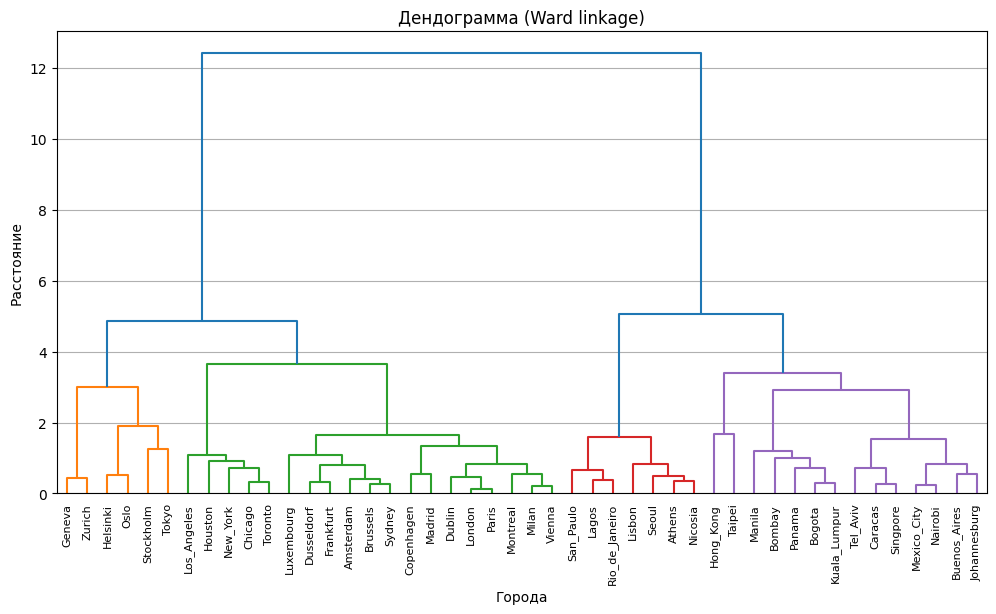

In [12]:
Z = linkage(X, method="ward", metric="euclidean")


if isinstance(df_clean["City"].iloc[0], (int, np.integer)) and 'id_to_city' in globals():
    labels = [id_to_city.get(cid, str(cid)) for cid in df_clean["City"]]
else:
    labels = df_clean["City"].astype(str).tolist()

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=labels,color_threshold=4)
plt.title("Дендограмма (Ward linkage)")
plt.xlabel("Города")
plt.ylabel("Расстояние")
plt.grid(True, axis="y")
plt.show()


Для оценки кол-ва кластеров построим диаграмму метода локтя

Text(0, 0.5, 'Расстояние')

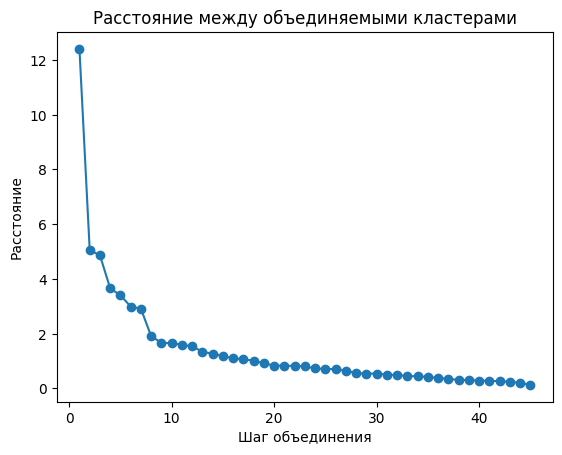

In [13]:
dist = Z[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

По дедндраграмме и диаграмме локтя можно увидеть, что эффективнее всего использовать 4 класса для более интересных результатов.
Т.к. скорее всего взяв 2 класса как нам рекомендует питон, он поделит города на условно бедные и богатые, а хотелось бы посмотреть на более глубокий анализ.

##Итерпритация результатов

Мы выразили среднее значение признаков по кластерам, для более легкой интерпритации

In [14]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z, t=4, criterion='distance')# получение меток кластера

df_clusters = df_clean.copy()
df_clusters["cluster"] = labels

cluster_stats = df_clusters.groupby("cluster")[["Work", "Price", "Salary"]].mean().round(2)
display(cluster_stats)


,Work,Price,Salary
cluster,,,
1,1780.50,108.55,71.30
2,1792.00,77.53,55.16
3,1798.86,50.94,19.21
4,2082.36,53.12,14.91


И так фактически, мы поделили данные на 4 кластера(можно больше, можно меньше).

* К **1 кластеру** отнесли города с
самыми высокими ценами и самыми высокими зарплатами. Это развитые города, высокая стоимость жизни компенсируется высоким доходом.
* К **2му кластеру** с относительно средними показателями. Это тоже развитые города, в них более сбалансированный уровень жизни и среднее экономическое развитие.
* К **3ему кластеру** относятся города с так называемой "дорогой жизнью", где высокие цены, но низкие доходы, вних развита сильная социальная неравномерность.
* К **4 кластеру** относятся города с средней стоимостью жизни, но и низким уровнем доходов. «Рабочие» или индустриальные города с самым высоким количеством рабочих часов.